In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import cv2

In [3]:
df_train=pd.read_csv("train.csv")

In [4]:
df_test=pd.read_csv("test.csv")

In [5]:
df_train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [6]:
df_train_label=df_train['label']

In [7]:
df_train.drop('label',axis=1,inplace=True)

In [8]:
df_train=df_train/255
df_test=df_test/255

In [9]:
df_train=df_train.values.reshape(-1,28,28,1)
df_test=df_test.values.reshape(-1,28,28,1)

In [10]:
type(df_train)

numpy.ndarray

In [16]:
def erode_img(img):
    erode_arr=[]
    for i in img:
        erode_arr.append(np.array(cv2.dilate(i,(3,3)).reshape(28,28,1)))
    return np.array(erode_arr)

In [17]:
def threshold(img):
    threshold_arr=[]
    for i in img:
        a , ret=cv2.threshold(i,0.35,1,cv2.THRESH_BINARY)
        threshold_arr.append(np.array(ret).reshape(28,28,1))
    return np.array(threshold_arr)

In [18]:
df_train_thresh=threshold(df_train)
df_train_erode=erode_img(df_train_thresh)

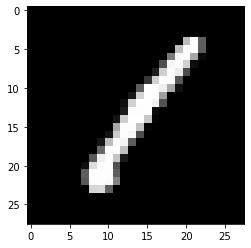

In [19]:
plt.imshow(df_train[0][:,:,0],cmap='gray')

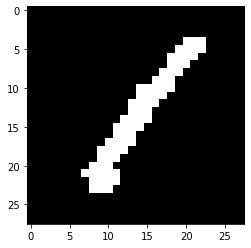

In [20]:
plt.imshow(df_train_thresh[0][:,:,0],cmap='gray')

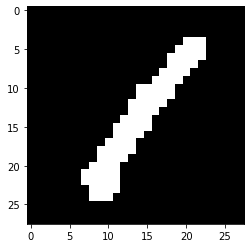

In [21]:
plt.imshow(df_train_erode[0][:,:,0],cmap='gray')

In [22]:
df_train_label.value_counts()

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

In [23]:
df_train_cat=pd.get_dummies(df_train_label)

In [24]:
X_train,X_test,y_train,y_test=train_test_split(df_train_erode,df_train_label.values,random_state=101,test_size=0.3)

In [25]:
y_train.shape

(29400,)

In [26]:
y_train_cat=pd.get_dummies(y_train)
y_test_cat=pd.get_dummies(y_test)

In [27]:
X_train.shape

(29400, 28, 28, 1)

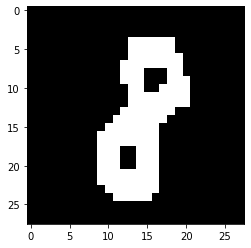

In [28]:
plt.imshow(X_train[0].reshape(28,28),cmap='gray')

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten,Dropout

In [30]:
model = Sequential()

model.add(Conv2D(filters=64, kernel_size=(4,4),input_shape=(28, 28, 1), activation='relu',padding='valid'))
model.add(Conv2D(filters=64, kernel_size=(4,4), activation='relu',padding='valid'))
model.add(MaxPool2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(10, activation = "softmax"))

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 25, 25, 64)        1088      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 22, 22, 64)        65600     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 11, 11, 64)        0         
_________________________________________________________________
flatten (Flatten)            (None, 7744)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1982720   
_________________________________________________________________
dropout (Dropout)            (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 64)                1

In [32]:
model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [33]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss',patience=2)

In [34]:
model.fit(X_train,y_train_cat.values,epochs=10,callbacks=[early_stop],validation_data=[X_test,y_test_cat.values])

Train on 29400 samples, validate on 12600 samples
Epoch 1/10
29400/29400 [==============================] - 128s 4ms/sample - loss: 0.2709 - accuracy: 0.9184 - val_loss: 0.0908 - val_accuracy: 0.9709
Epoch 2/10
29400/29400 [==============================] - 108s 4ms/sample - loss: 0.1003 - accuracy: 0.9712 - val_loss: 0.0563 - val_accuracy: 0.9838
Epoch 3/10
29400/29400 [==============================] - 113s 4ms/sample - loss: 0.0696 - accuracy: 0.9801 - val_loss: 0.0527 - val_accuracy: 0.9838
Epoch 4/10
29400/29400 [==============================] - 126s 4ms/sample - loss: 0.0540 - accuracy: 0.9839 - val_loss: 0.0500 - val_accuracy: 0.9852
Epoch 5/10
29400/29400 [==============================] - 130s 4ms/sample - loss: 0.0413 - accuracy: 0.9884 - val_loss: 0.0596 - val_accuracy: 0.9840
Epoch 6/10
29400/29400 [==============================] - 115s 4ms/sample - loss: 0.0338 - accuracy: 0.9900 - val_loss: 0.0446 - val_accuracy: 0.9883
Epoch 7/10
29400/29400 [==========================

In [35]:
losses=pd.DataFrame(model.history.history)

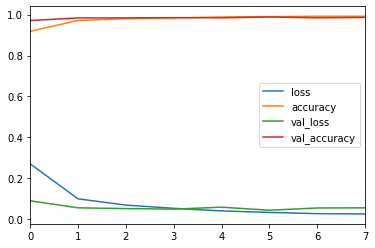

In [36]:
losses.plot()

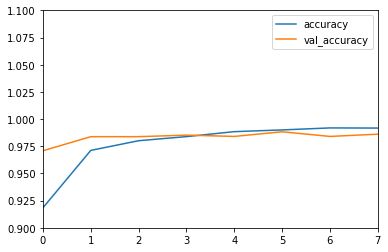

In [37]:
losses[['accuracy','val_accuracy']].plot(ylim=(0.9,1.1))

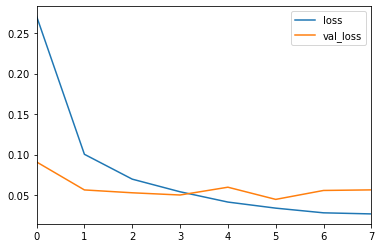

In [38]:
losses[['loss','val_loss']].plot()

In [39]:
from sklearn.metrics import classification_report,confusion_matrix

In [40]:
predictions = model.predict_classes(X_test)

In [41]:
predictions

array([1, 3, 0, ..., 9, 3, 6])

In [42]:
y_test

array([1, 3, 0, ..., 9, 3, 6])

In [43]:
print(confusion_matrix(predictions,y_test))

[[1206    0    2    0    1    1    1    0    1    3]
 [   1 1410    5    0    0    0    1    1    1    1]
 [   1    3 1228    4    0    0    1    6    1    0]
 [   0    2    1 1251    0    4    0    1    0    1]
 [   0    0    0    0 1207    0    1    3    3   20]
 [   0    1    0   12    0 1101    1    1    0    3]
 [   2    2    0    0    0   12 1235    0    5    0]
 [   0    2   11    5    0    0    0 1302    0    5]
 [   3    1   11    9    0    2    2    0 1216    7]
 [   0    1    0    3    1    1    0    1    0 1269]]


In [44]:
print(classification_report(predictions,y_test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1215
           1       0.99      0.99      0.99      1420
           2       0.98      0.99      0.98      1244
           3       0.97      0.99      0.98      1260
           4       1.00      0.98      0.99      1234
           5       0.98      0.98      0.98      1119
           6       0.99      0.98      0.99      1256
           7       0.99      0.98      0.99      1325
           8       0.99      0.97      0.98      1251
           9       0.97      0.99      0.98      1276

    accuracy                           0.99     12600
   macro avg       0.99      0.99      0.99     12600
weighted avg       0.99      0.99      0.99     12600



In [45]:
model.evaluate(X_test,y_test_cat.values,verbose=0)

[0.05632632803091289, 0.9861111]

## Start predict

In [46]:
df_test_thresh=threshold(df_test)
df_test_erode=erode_img(df_test_thresh)

In [47]:
test_predictions=model.predict_classes(df_test_erode)

In [48]:
results = pd.Series(test_predictions,name="Label")

In [49]:
submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"),results],axis = 1)

In [50]:
submission

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3
...,...,...
27995,27996,9
27996,27997,7
27997,27998,3
27998,27999,9


In [51]:
submission.to_csv('submit5.csv',index=False)